In [1]:
import netCDF4 as nc
import glob
import numpy as np
import time as ti
import matplotlib.pylab as py
from IPython.display import display, clear_output
import numpy.ma as ma
import warnings
warnings.filterwarnings('ignore')
from scipy import optimize
import numpy.ma as ma
from scipy.optimize import curve_fit
from scipy.stats import chisquare
import hickle as hkl
import operator
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import shapely.geometry as shp
import shapely.ops as ops
from rtree import index
from datetime import datetime
import glob
import matplotlib
import cartopy.crs as ccrs
import cartopy.util as cutil
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import seaborn as sns

from functools import partial
import pyproj 

import logging
import time as ti
                
from pathlib import Path
import os
import calendar
from scipy import stats

import sys
sys.path.append('/data/pragallva/2023_repeat_ERA5/modules/')
import logruns as logruns
import save_and_load_hdf5_files as h5saveload
import netcdf_utilities as ncutil
import os
# os.environ["HDF5_USE_FILE_LOCKING"] = 'FALSE'
from tqdm import tqdm
import glob
from PIL import Image
import copy
import itertools
from datetime import date
import temporal_filter_for_all_years_in_one_level_with_seasonal_cycle as tf
import scipy as sc
from scipy.interpolate import interp1d

NH =''
SH ='S'

import matplotlib
cmap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", \
              [ "navy",  "dodgerblue", "PowderBlue", "white", \
                "khaki", "orange", "darkred"])

In [2]:
def science_blocks():
    py.plot(-9, 45,   'k*',   markersize=20,)# mfc='none')
    py.plot(-9, 45,   'wo',   markersize=2, )# mfc='none')
    py.plot(-147, 42, 'k*',   markersize=20,)# mfc='none')
    py.plot(-147, 42, 'wo',   markersize=2, )# mfc='none')
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

from scipy.signal import savgol_filter

month_names  = {0:'Jan',   1:'Feb',    2:'Mar',    3:'Apr',    4:'May',   5:'Jun',   6:'Jul',    7:'Aug',    8:'Sep',    9:'Oct',    10:'Nov',    11:'Dec'    }
days_no_leap = {  'Jan':31,  'Feb':28,   'Mar':31,   'Apr':30,   'May':31,  'Jun':30,  'Jul':31,   'Aug':31,   'Sep':30,   'Oct':31,    'Nov':30,    'Dec':31 }
days_leap    = {  'Jan':31,  'Feb':29,   'Mar':31,   'Apr':30,   'May':31,  'Jun':30,  'Jul':31,   'Aug':31,   'Sep':30,   'Oct':31,    'Nov':30,    'Dec':31 }

def leap_day(year):
    if calendar.isleap(year+1979):
        return days_leap
    else:
        return days_no_leap

In [3]:
source_NH                 = '/data/pragallva/2023_repeat_ERA5/post_processing/parameters/'
A_N                       = h5saveload.load_dict_from_hdf5(source_NH+'A_N.hdf5')
lat_N,  lon_N,  A_N_daily = A_N['lat'], A_N['lon'], A_N['field'][:-1,...]

In [5]:
source_NH                 = '/data/pragallva/2023_repeat_ERA5/post_processing/parameters/'
F1_N                       = h5saveload.load_dict_from_hdf5(source_NH+'F1_N.hdf5')
F2_N                       = h5saveload.load_dict_from_hdf5(source_NH+'F2a_N.hdf5')
F3_N                       = h5saveload.load_dict_from_hdf5(source_NH+'F3_N.hdf5')

lat_N,  lon_N,  F_N_daily = F1_N['lat'], F1_N['lon'], (F1_N['field']+F2_N['field']+F3_N['field'])

source_NH                 = '/data/pragallva/2023_repeat_ERA5/post_processing/parameters/'
A_N                       = h5saveload.load_dict_from_hdf5(source_NH+'A_N.hdf5')
lat_N,  lon_N,  A_N_daily = A_N['lat'], A_N['lon'], A_N['field'][:-1,...]

In [6]:
source_NH     = '/data/pragallva/2023_repeat_ERA5/post_processing/filtered_parameters/seasonal/'
A_N_seasonal  = h5saveload.load_dict_from_hdf5(source_NH+'A_N.hdf5')
lat_N,  lon_N,  A_N_seasonal = A_N['lat'], A_N['lon'], A_N_seasonal['field'][:-1,...]

In [7]:
A0_mini     = A_N_seasonal[:,[0,1,11],...].mean(axis=0).mean(axis=0).mean(axis=0)
annual_mean = np.nanmean(np.nanmean(np.nanmean(A_N_daily, axis=0), axis=0), axis=0)

In [8]:
# lat_slice = np.squeeze(np.where((lat_N>=40) &(lat_N<60)))
# sns.boxplot(x=A_N_daily[:,[11,0,1],:, :, :][...,lat_slice,:].flatten(), \
#                y=F_N_daily[:,[11,0,1],:, :, :][...,lat_slice,:].flatten(), orient='v')

In [ ]:
lat_slice = np.squeeze(np.where((lat_N>=30) &(lat_N<60)))
sns.histplot( x = A_N_daily[:,[11,0,1],:, :, :][...,lat_slice,:].flatten(), \
              y = F_N_daily[:,[11,0,1],:, :, :][...,lat_slice,:].flatten(), )

In [9]:
ls /data/pragallva/2023_repeat_ERA5/post_processing/filtered_parameters/band_pass_time_filter_004-infy_days/A_N.hdf5

/data/pragallva/2023_repeat_ERA5/post_processing/filtered_parameters/band_pass_time_filter_004-infy_days/A_N.hdf5


In [10]:
# A_N['field'].shape

In [11]:
%%time
A_N  = h5saveload.load_dict_from_hdf5('/data/pragallva/2023_repeat_ERA5/post_processing/filtered_parameters/band_pass_time_filter_004-infy_days/A_N.hdf5', track=True)
U_N  = h5saveload.load_dict_from_hdf5('/data/pragallva/2023_repeat_ERA5/post_processing/filtered_parameters/band_pass_time_filter_004-infy_days/U_N.hdf5', track=True)
F1_N = h5saveload.load_dict_from_hdf5('/data/pragallva/2023_repeat_ERA5/post_processing/filtered_parameters/band_pass_time_filter_004-infy_days/F1_N.hdf5', track=True)
F2_N = h5saveload.load_dict_from_hdf5('/data/pragallva/2023_repeat_ERA5/post_processing/filtered_parameters/band_pass_time_filter_004-infy_days/F2a_N.hdf5', track=True)
F3_N = h5saveload.load_dict_from_hdf5('/data/pragallva/2023_repeat_ERA5/post_processing/filtered_parameters/band_pass_time_filter_004-infy_days/F3_N.hdf5', track=True)

100%|█████████████████████████████████████████████| 3/3 [00:04<00:00,  1.43s/it]

CPU times: user 41.3 ms, sys: 10.7 s, total: 10.8 s
Wall time: 21.8 s


In [13]:
F_N = F1_N['field']+F2_N['field']+F3_N['field']

100%|██████████████████████████| 43189200/43189200 [00:17<00:00, 2472966.23it/s]


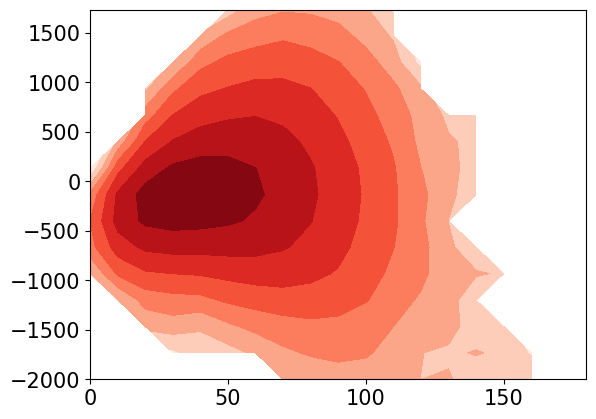

In [15]:
lat_slice = np.squeeze(np.where((lat_N>=30) &(lat_N<60)))
# Ai   =  A_N['field'][:,[11,0,1],:, :, :][...,lat_slice,:].flatten()
# Fi   =  F_N[:,[11,0,1],:, :, :][...,lat_slice,:].flatten()

djf_AN = np.nanmean(np.nanmean(np.nanmean(A_N_daily[:-1,[11,0,1],:, :, :], axis=0), axis=0), axis=0)### This is A0 
Ai   =  (A_N['field'][:-1,[11,0,1],:, :, :]+djf_AN[None,None,None,...])[...,lat_slice,:].flatten()
Fi   =  F_N[:-1,[11,0,1],:, :, :][...,lat_slice,:].flatten()


# Ai   =  A_N_daily[:,[11,0,1],:, :, :][...,lat_slice,:].flatten()
# Fi   =  F_N_daily[:,[11,0,1],:, :, :][...,lat_slice,:].flatten()

ai_edges = np.arange(0, 200, 10)
fi_edges = np.linspace(-2000, 2000, 16)
hist, Ai_bins, Fi_bins = np.histogram2d(Ai[~np.isnan(Ai)], Fi[~np.isnan(Ai)], bins=(ai_edges,fi_edges))

py.contourf(Ai_bins[:-1], Fi_bins[:-1], np.log(hist.T), cmap=py.cm.Reds)

Ai_digitize = np.digitize(Ai, Ai_bins)-1
Ai_repeat = []
for i in tqdm(Ai_digitize):
    Ai_repeat.append(Ai_bins[i])

Ai_repeat = np.array(Ai_repeat, dtype=np.int)


In [42]:
F_N.shape

(44, 12, 31, 60, 360)

100%|██████████████████████████| 43189200/43189200 [00:17<00:00, 2504888.71it/s]


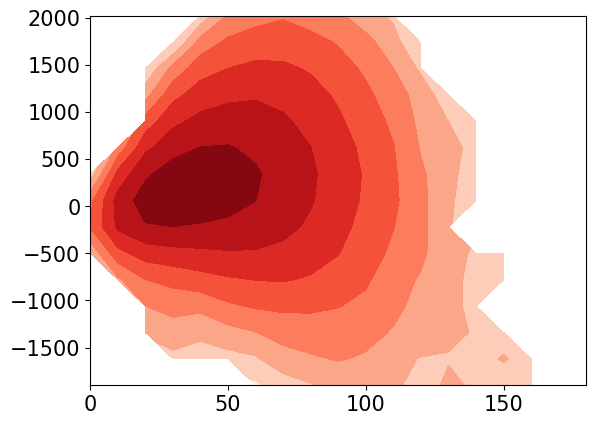

In [43]:
lat_slice = np.squeeze(np.where((lat_N>=30) &(lat_N<60)))
# Ai   =  A_N['field'][:,[11,0,1],:, :, :][...,lat_slice,:].flatten()
# Fi   =  F_N[:,[11,0,1],:, :, :][...,lat_slice,:].flatten()

djf_AN = np.nanmean(np.nanmean(np.nanmean(A_N_daily[:,[11,0,1],:, :, :], axis=0), axis=0), axis=0)### This is A0 
djf_FN = np.nanmean(np.nanmean(np.nanmean(F_N_daily[:-1,[11,0,1],:, :, :], axis=0), axis=0), axis=0)### This is A0 

Ai   =  (A_N['field'][:-1,[11,0,1],:, :, :]+djf_AN[None,None,None,...])[...,lat_slice,:].flatten()
Fi   =  (F_N[:-1,[11,0,1],:, :, :]         +djf_FN[None,None,None,...])[...,lat_slice,:].flatten()


# Ai   =  A_N_daily[:,[11,0,1],:, :, :][...,lat_slice,:].flatten()
# Fi   =  F_N_daily[:,[11,0,1],:, :, :][...,lat_slice,:].flatten()

ai_edges = np.arange(0, 200, 10)
fi_edges = np.linspace(-1900, 2300, 16)
hist, Ai_bins, Fi_bins = np.histogram2d(Ai[~np.isnan(Ai)], Fi[~np.isnan(Ai)], bins=(ai_edges,fi_edges))

py.contourf(Ai_bins[:-1], Fi_bins[:-1], np.log(hist.T), cmap=py.cm.Reds)

Ai_digitize = np.digitize(Ai, Ai_bins)-1
Ai_repeat = []
for i in tqdm(Ai_digitize):
    Ai_repeat.append(Ai_bins[i])

Ai_repeat = np.array(Ai_repeat, dtype=np.int)


In [37]:
djf_FN.shape

(60, 360)

In [34]:
np.linspace(-2000, 2000, 16)

array([-2000.        , -1733.33333333, -1466.66666667, -1200.        ,
        -933.33333333,  -666.66666667,  -400.        ,  -133.33333333,
         133.33333333,   400.        ,   666.66666667,   933.33333333,
        1200.        ,  1466.66666667,  1733.33333333,  2000.        ])

In [38]:
A_N_daily.shape

(43, 12, 31, 60, 360)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


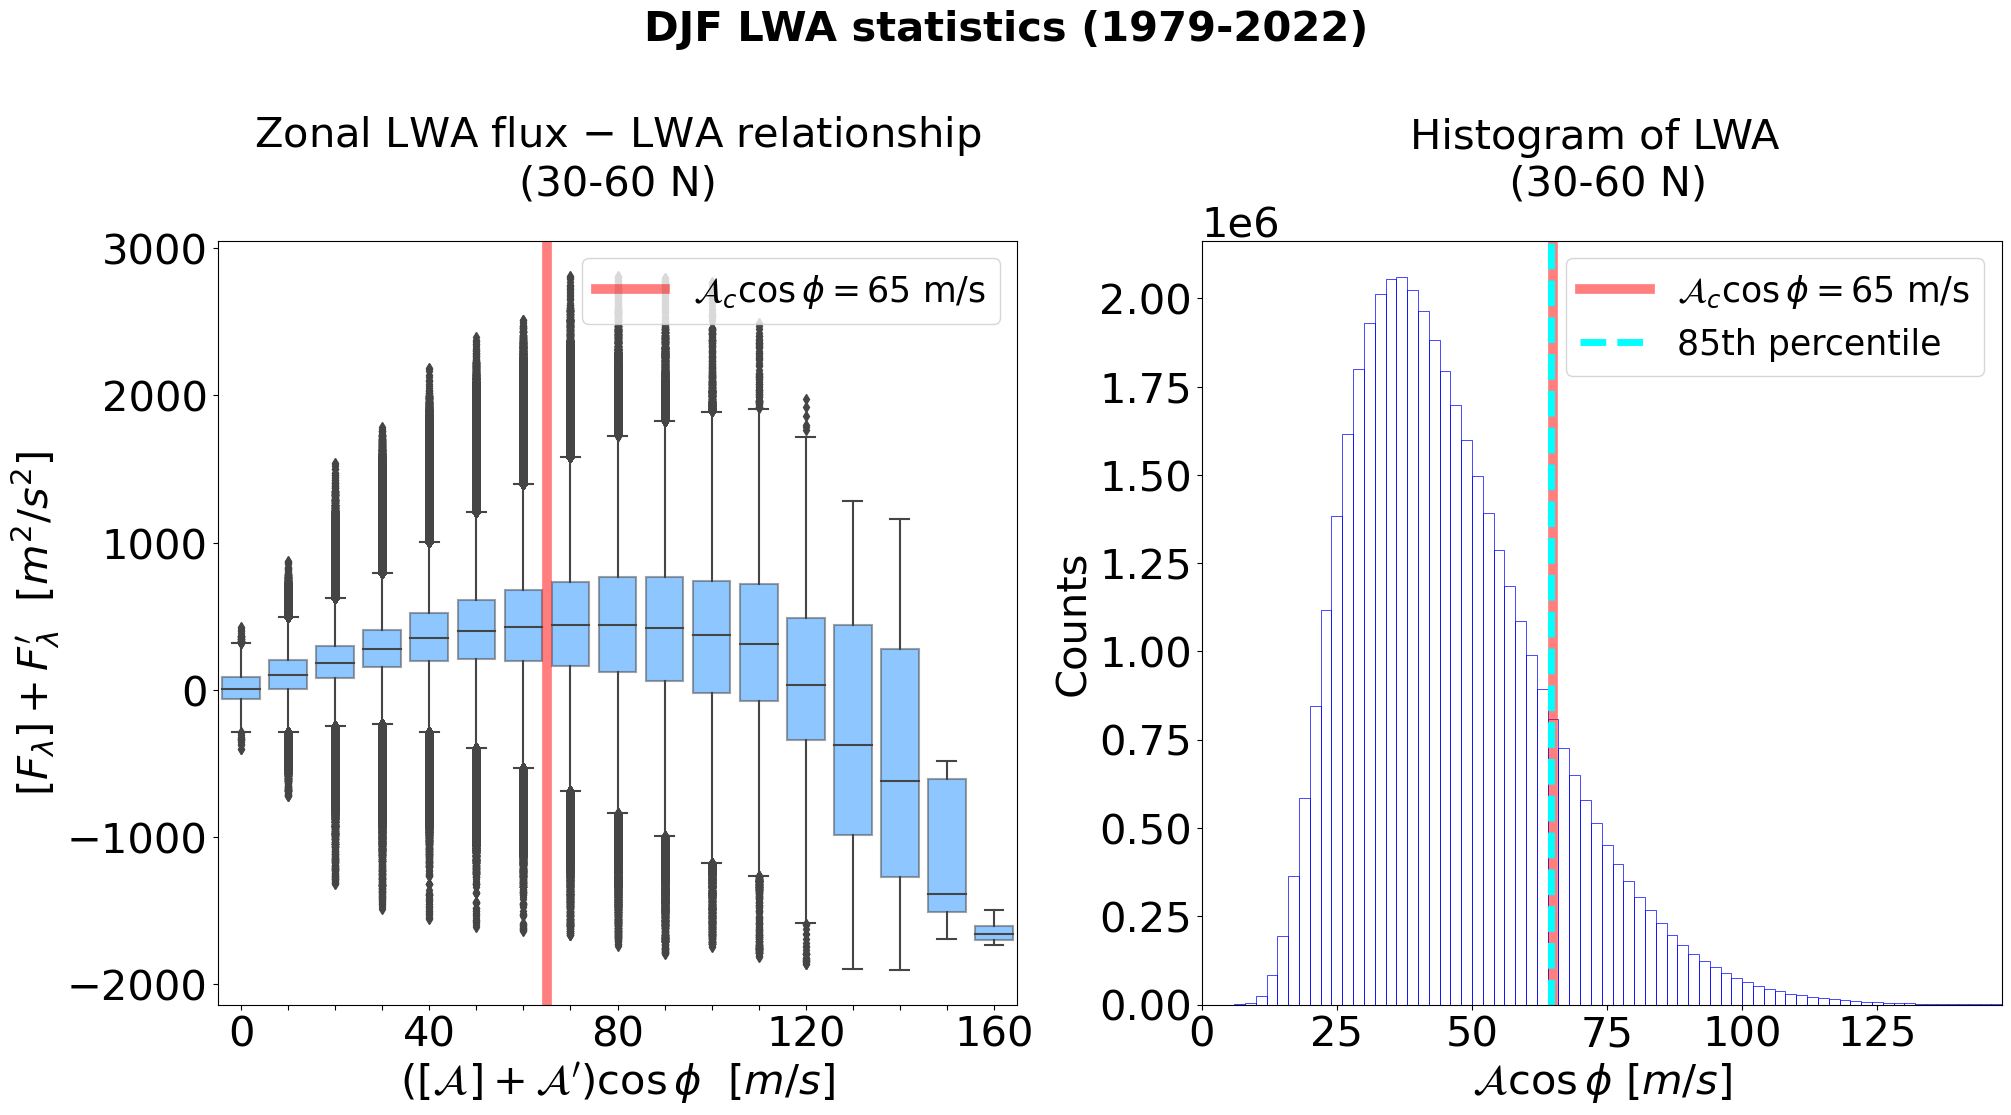

In [46]:
fig, axs= py.subplots(1,2,figsize=(20,10), constrained_layout=True)

ax = axs[0]
plot_=sns.boxplot(x=Ai_repeat, y=Fi, ax=ax, boxprops={"facecolor": "dodgerblue", "alpha":0.5},)
ax.set_xlabel(r'$([\mathcal{A}] + \mathcal{A}^\prime) \cos \phi$  '+'$[m/s]$', fontsize=30)
ax.set_ylabel(r'${[F_{\lambda}}] + F_{\lambda}^{\prime}$'+r'  [$m^2/s^2$]', fontsize=30)
ax.tick_params(labelsize=30)
ax.set_title(r'Zonal LWA flux $-$ LWA relationship' +'\n(30-60 N)', fontsize=30, y=1.05)
# ax.set_xticks(list(np.arange(0, 200, 40)))
# ax.set_xticklabels(["%d"%(d) for d in np.arange(0, 200, 40)])
for label in plot_.get_xticklabels():
    if np.int(label.get_text()) % 40 == 0:  
        label.set_visible(True)
    else:
        label.set_visible(False)
ax.axvline(6.5, color='red', alpha=0.5, lw=7,  label=r'$\mathcal{A}_c \cos \phi = 65$ m/s')
ax.legend(loc='upper right', fontsize=25)


ax = axs[1]
sns.histplot(A_N_daily[:,[11,0,1],:, :, :][...,lat_slice,:].flatten(), fill=False, binwidth=2, ax=ax, color='blue')
ax.set_xlabel(r'$ \mathcal{A} \cos\phi$'+r' $[m/s]$', fontsize=30)
ax.set_ylabel('Counts', fontsize=30)
ax.tick_params(labelsize=30)
ax.set_title('Histogram of LWA \n (30-60 N)', fontsize=30, y=1.05)
ax.axvline(65, color='red', linewidth=7, alpha=0.5, label=r'$\mathcal{A}_c \cos\phi = 65$ m/s')
ax.axvline(np.nanpercentile(A_N_daily[:,[11,0,1],:, :, :][...,lat_slice,:].flatten(), 85), color='cyan', linestyle='dashed', label='85th percentile', linewidth=5)
ax.legend(loc='best', fontsize=25)
ax.set_xlim(0, 148)
ax.yaxis.get_offset_text().set_fontsize(30)

fig.suptitle('DJF LWA statistics (1979-2022)', fontsize=30, y=1.1, fontweight='bold')

dest = './nnn_suggestions/'
os.makedirs(dest, exist_ok=True)
fig.savefig(dest+'DJF_LWA_stats.png', dpi=300, bbox_inches='tight')
fig.savefig(dest+'DJF_LWA_stats.pdf', bbox_inches='tight')
fig.savefig(dest+'DJF_LWA_stats.eps', bbox_inches='tight', format='eps')
fig.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

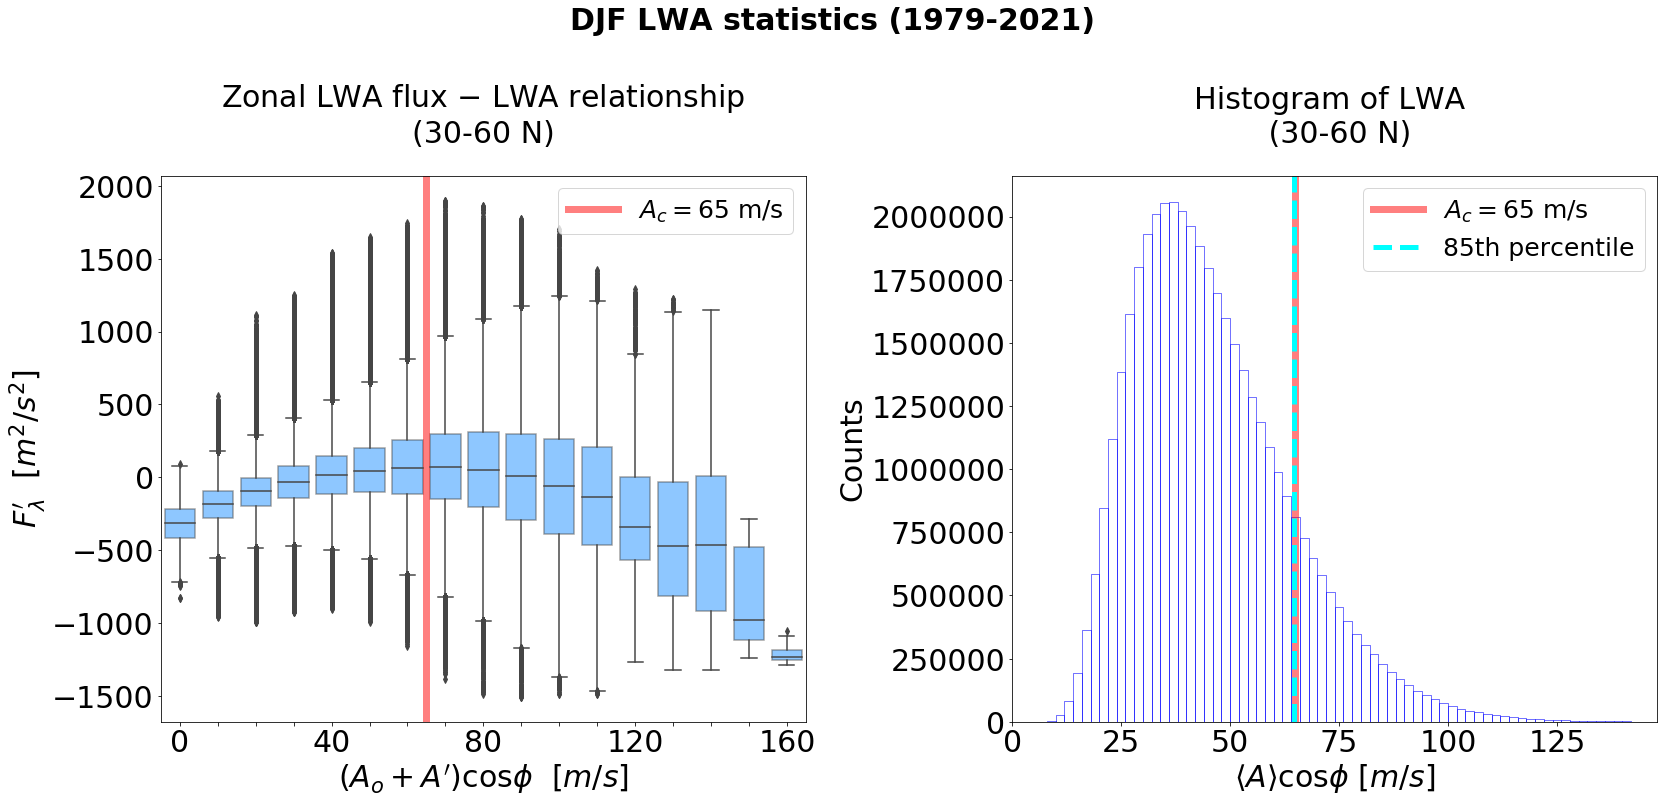

In [161]:
fig, axs= py.subplots(1,2,figsize=(23,10), constrained_layout=True)

ax = axs[0]
plot_=sns.boxplot(x=Ai_repeat, y=Fi, ax=ax, boxprops={"facecolor": "dodgerblue", "alpha":0.5},)
ax.set_xlabel(r'$(A_o + A^\prime) \cos\phi$  '+'$[m/s]$', fontsize=30)
ax.set_ylabel(r'$F_{\lambda}^{\prime}$'+r'  [$m^2/s^2$]', fontsize=30)
ax.tick_params(labelsize=30)
ax.set_title(r'Zonal LWA flux $-$ LWA relationship' +'\n(30-60 N)', fontsize=30, y=1.05)
# ax.set_xticks(list(np.arange(0, 200, 40)))
# ax.set_xticklabels(["%d"%(d) for d in np.arange(0, 200, 40)])
for label in plot_.get_xticklabels():
    if np.int(label.get_text()) % 40 == 0:  
        label.set_visible(True)
    else:
        label.set_visible(False)
ax.axvline(6.5, color='red', alpha=0.5, lw=7,  label=r'$A_c = 65$ m/s')
ax.legend(loc='upper right', fontsize=25)


ax = axs[1]
sns.histplot(A_N_daily[:,[11,0,1],:, :, :][...,lat_slice,:].flatten(), fill=False, binwidth=2, ax=ax, color='blue')
ax.set_xlabel(r'$\langle A \rangle \cos\phi$'+r' $[m/s]$', fontsize=30)
ax.set_ylabel('Counts', fontsize=30)
ax.tick_params(labelsize=30)
ax.set_title('Histogram of LWA \n (30-60 N)', fontsize=30, y=1.05)
ax.axvline(65, color='red', linewidth=7, alpha=0.5, label=r'$A_c = 65$ m/s')
ax.axvline(np.nanpercentile(A_N_daily[:,[11,0,1],:, :, :][...,lat_slice,:].flatten(), 85), color='cyan', linestyle='dashed', label='85th percentile', linewidth=5)
ax.legend(loc='best', fontsize=25)
ax.set_xlim(0, 148)
fig.suptitle('DJF LWA statistics (1979-2021)', fontsize=30, y=1.1, fontweight='bold')

dest = '/data/pragallva/2023_repeat_ERA5/2023_paper_figures/'
os.makedirs(dest, exist_ok=True)
fig.savefig(dest+'DJF_LWA_stats.png', dpi=300, bbox_inches='tight')
fig.savefig(dest+'DJF_LWA_stats.pdf', bbox_inches='tight')
fig.savefig(dest+'DJF_LWA_stats.eps', bbox_inches='tight', format='eps')
fig.show()

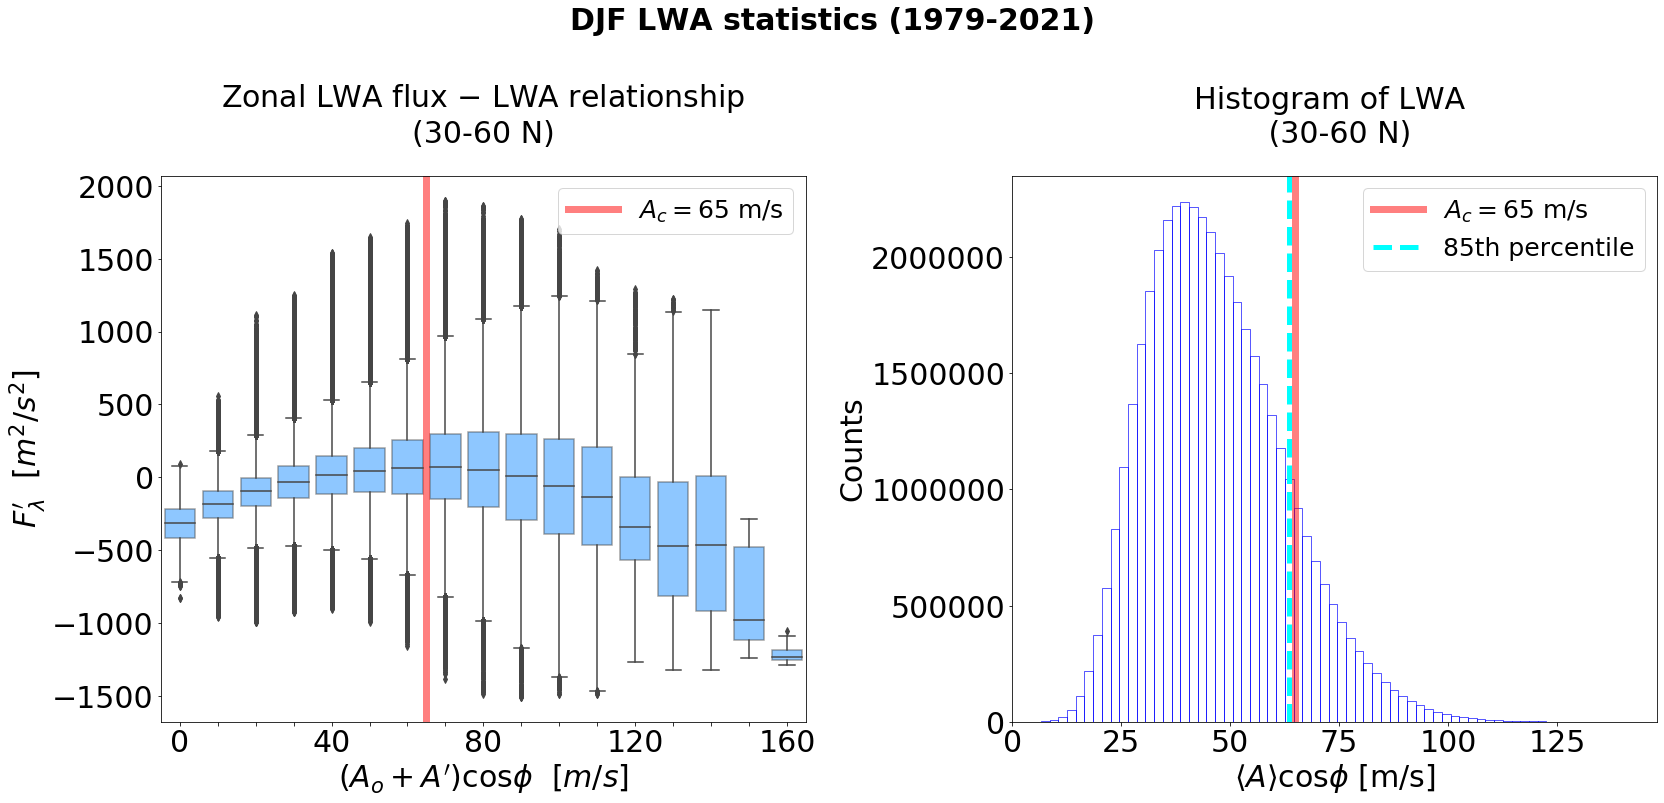

In [159]:
fig, axs= py.subplots(1,2,figsize=(23,10), constrained_layout=True)

ax = axs[0]
plot_=sns.boxplot(x=Ai_repeat, y=Fi, ax=ax, boxprops={"facecolor": "dodgerblue", "alpha":0.5},)
ax.set_xlabel(r'$(A_o + A^\prime) \cos\phi$  '+'$[m/s]$', fontsize=30)
ax.set_ylabel(r'$F_{\lambda}^{\prime}$'+r'  [$m^2/s^2$]', fontsize=30)
ax.tick_params(labelsize=30)
ax.set_title(r'Zonal LWA flux $-$ LWA relationship' +'\n(30-60 N)', fontsize=30, y=1.05)
# ax.set_xticks(list(np.arange(0, 200, 40)))
# ax.set_xticklabels(["%d"%(d) for d in np.arange(0, 200, 40)])
for label in plot_.get_xticklabels():
    if np.int(label.get_text()) % 40 == 0:  
        label.set_visible(True)
    else:
        label.set_visible(False)
ax.axvline(6.5, color='red', alpha=0.5, lw=7,  label=r'$A_c = 65$ m/s')
ax.legend(loc='upper right', fontsize=25)


ax = axs[1]
sns.histplot(Ai, fill=False, binwidth=2, ax=ax, color='blue')
ax.set_xlabel(r'$\langle A \rangle \cos\phi$'+' [m/s]', fontsize=30)
ax.set_ylabel('Counts', fontsize=30)
ax.tick_params(labelsize=30)
ax.set_title('Histogram of LWA \n (30-60 N)', fontsize=30, y=1.05)
ax.axvline(65, color='red', linewidth=7, alpha=0.5, label=r'$A_c = 65$ m/s')
ax.axvline(np.nanpercentile(Ai, 85), color='cyan', linestyle='dashed', label='85th percentile', linewidth=5)
ax.legend(loc='best', fontsize=25)
ax.set_xlim(0, 148)
fig.suptitle('DJF LWA statistics (1979-2021)', fontsize=30, y=1.1, fontweight='bold')

# dest = '/data/pragallva/2023_repeat_ERA5/jupyter_notebooks/notebooks_to_finalise_paper_figures/paper_figures/'
# os.makedirs(dest, exist_ok=True)
# fig.savefig(dest+'DJF_LWA_stats.png', dpi=300, bbox_inches='tight')
# fig.savefig(dest+'DJF_LWA_stats.pdf', bbox_inches='tight')

fig.show()

Text(0.5, 1.1, 'DJF filtered DJF LWA statistics (1979-2021)')

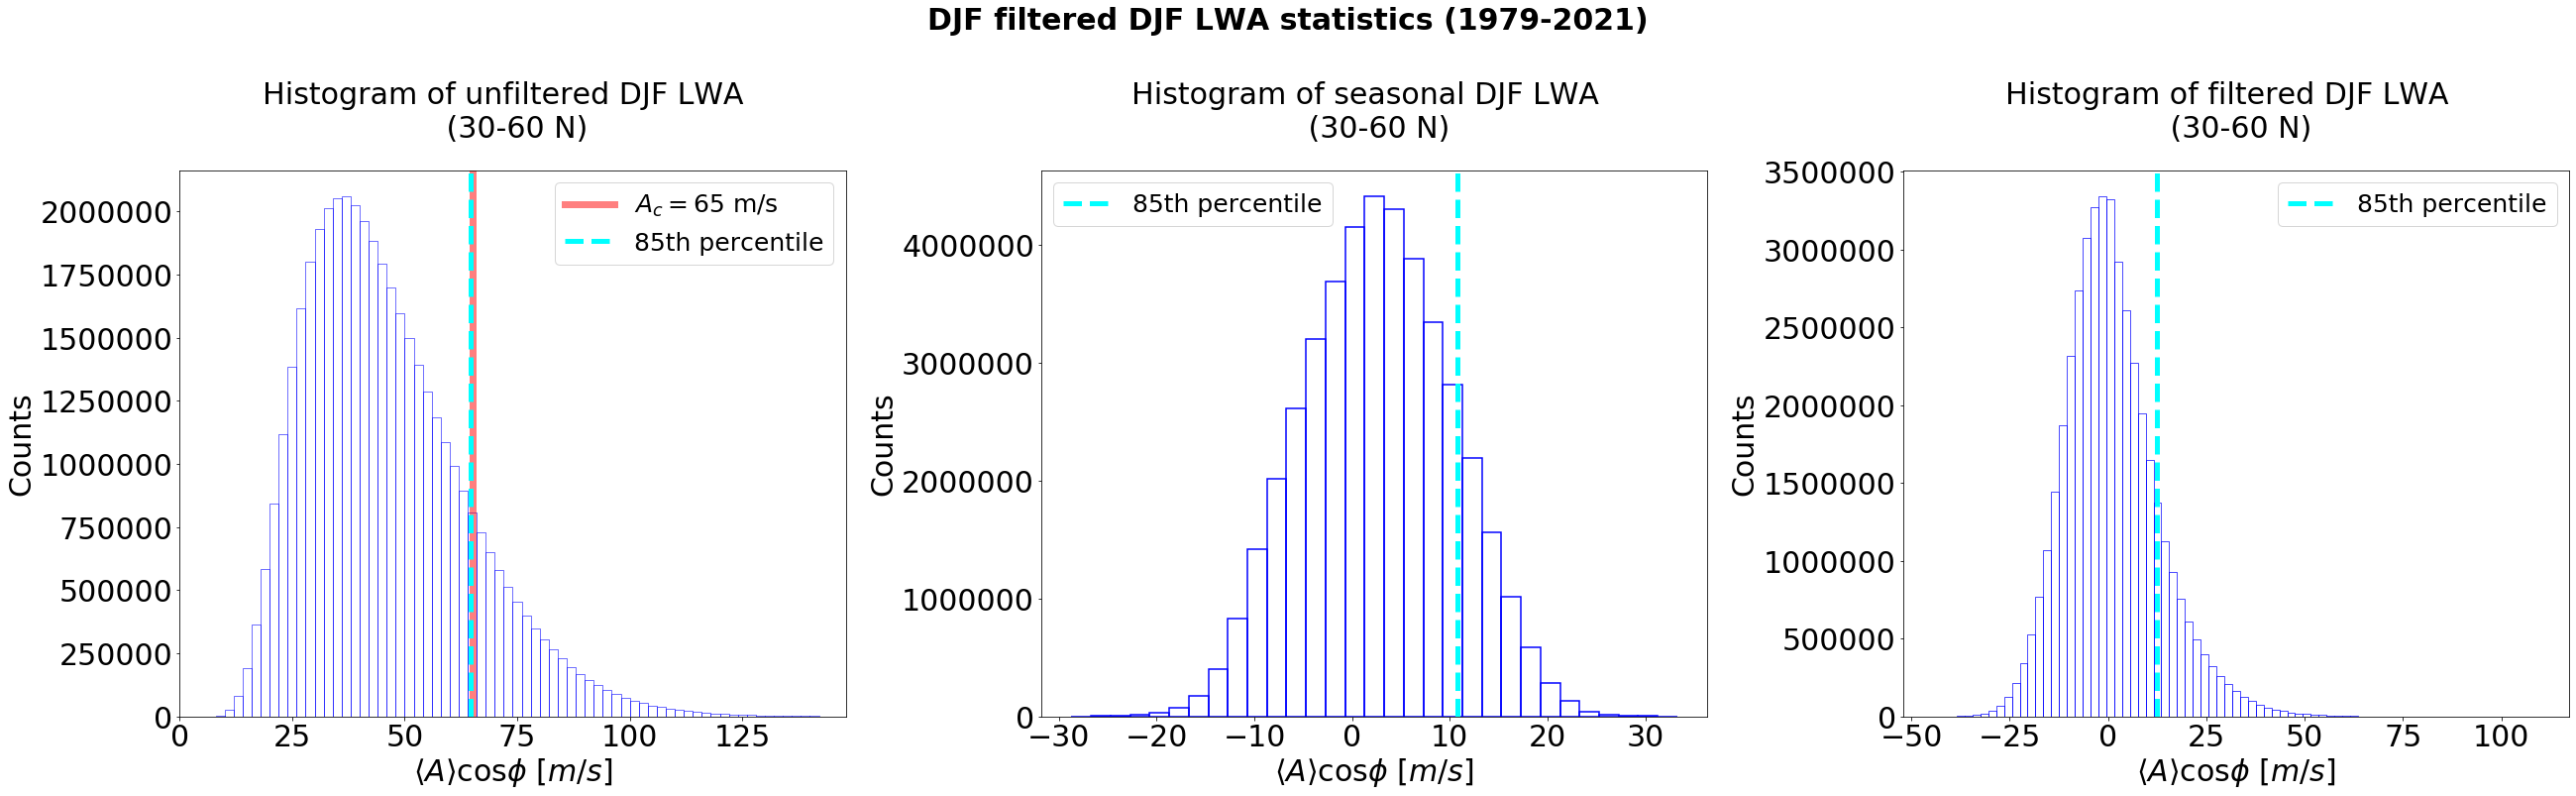

In [16]:
fig, axs= py.subplots(1,3,figsize=(36,10), constrained_layout=True)

ax = axs[0]
sns.histplot(A_N_daily[:,[11,0,1],:, :, :][...,lat_slice,:].flatten(), fill=False, binwidth=2, ax=ax, color='blue')
ax.set_xlabel(r'$\langle A \rangle \cos\phi$'+r' $[m/s]$', fontsize=30)
ax.set_ylabel('Counts', fontsize=30)
ax.tick_params(labelsize=30)
ax.set_title('Histogram of unfiltered DJF LWA  \n (30-60 N)', fontsize=30, y=1.05)
ax.axvline(65, color='red', linewidth=7, alpha=0.5, label=r'$A_c = 65$ m/s')
ax.axvline(np.nanpercentile(A_N_daily[:,[11,0,1],:, :, :][...,lat_slice,:].flatten(), 85), color='cyan', linestyle='dashed', label='85th percentile', linewidth=5)
ax.legend(loc='best', fontsize=25)
ax.set_xlim(0, 148)
fig.suptitle('DJF total LWA statistics (1979-2021)', fontsize=30, y=1.1, fontweight='bold')


ax = axs[1]
sns.histplot(A_N_seasonal[:,[11,0,1],:, :, :][...,lat_slice,:].flatten(), fill=False, binwidth=2, ax=ax, color='blue')
ax.set_xlabel(r'$\langle A \rangle \cos\phi$'+r' $[m/s]$', fontsize=30)
ax.set_ylabel('Counts', fontsize=30)
ax.tick_params(labelsize=30)
ax.set_title('Histogram of seasonal DJF LWA  \n (30-60 N)', fontsize=30, y=1.05)
# ax.axvline(65, color='red', linewidth=7, alpha=0.5, label=r'$A_c = 65$ m/s')
ax.axvline(np.nanpercentile(A_N_seasonal[:,[11,0,1],:, :, :][...,lat_slice,:].flatten(), 85), color='cyan', linestyle='dashed', label='85th percentile', linewidth=5)
ax.legend(loc='best', fontsize=25)
# ax.set_xlim(0, 148)
fig.suptitle('DJF seasonal DJF LWA statistics (1979-2021)', fontsize=30, y=1.1, fontweight='bold')


ax = axs[2]
sns.histplot(A_N['field'][:-1,[11,0,1],:, :, :][...,lat_slice,:].flatten(), fill=False, binwidth=2, ax=ax, color='blue')
ax.set_xlabel(r'$\langle A \rangle \cos\phi$'+r' $[m/s]$', fontsize=30)
ax.set_ylabel('Counts', fontsize=30)
ax.tick_params(labelsize=30)
ax.set_title('Histogram of filtered DJF LWA  \n (30-60 N)', fontsize=30, y=1.05)
# ax.axvline(65, color='red', linewidth=7, alpha=0.5, label=r'$A_c = 65$ m/s')
ax.axvline(np.nanpercentile(A_N['field'][:-1,[11,0,1],:, :, :][...,lat_slice,:].flatten(), 85), color='cyan', linestyle='dashed', label='85th percentile', linewidth=5)
ax.legend(loc='best', fontsize=25)
# ax.set_xlim(0, 148)
fig.suptitle('DJF filtered DJF LWA statistics (1979-2021)', fontsize=30, y=1.1, fontweight='bold')